# Q3

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
data_path = '../data/'
file_scene = 'where_is_waldo.jpg'
file_waldo_1 = 'template1.png'
file_waldo_2 = 'template2.png'

In [3]:
def print_images(list_of_images, size = 20):
    fig, ax = plt.subplots(1, len(list_of_images), figsize=(size,size))
    for i, (img, name) in enumerate(list_of_images):
        ax[i].set_title(str(name))
        ax[i].imshow(img);

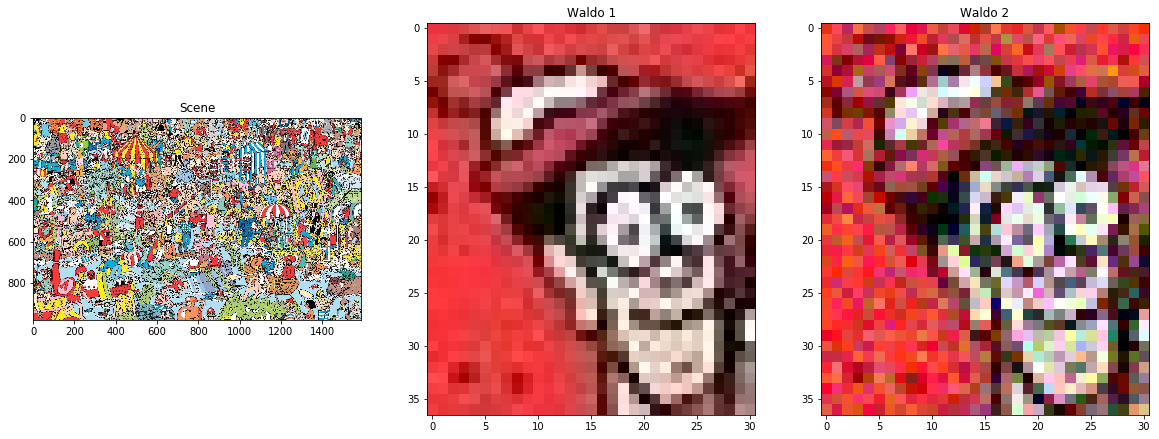

In [4]:
# Getting images and convert to BGR
img_scene = cv2.imread(data_path + file_scene)
img_scene = cv2.cvtColor(img_scene, cv2.COLOR_BGR2RGB)
img_waldo_1 = cv2.imread(data_path + file_waldo_1)
img_waldo_1 = cv2.cvtColor(img_waldo_1, cv2.COLOR_BGR2RGB)
img_waldo_2 = cv2.imread(data_path + file_waldo_2)
img_waldo_2 = cv2.cvtColor(img_waldo_2, cv2.COLOR_BGR2RGB)

print_images([(img_scene, 'Scene'), (img_waldo_1, 'Waldo 1'), (img_waldo_2, 'Waldo 2')])

### Part 1

In [5]:
def find_waldo(scene, face):
    img_ = scene.copy()
    height, width, channels = face.shape

    result = cv2.matchTemplate(img_, face, cv2.TM_SQDIFF)
    
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    print("Coordinates for absolute minimum is (x,y) -> (%s, %s)" %(min_loc[0], min_loc[1]))
    cv2.rectangle(img_, min_loc, (min_loc[0] + width, min_loc[1] + height), (255,255,0), 3)
    
    # display images
    print_images([(result, 'Matched Template result (SSD)'), (img_, 'Matched Image')])

Coordinates for absolute minimum is (x,y) -> (1258, 74)


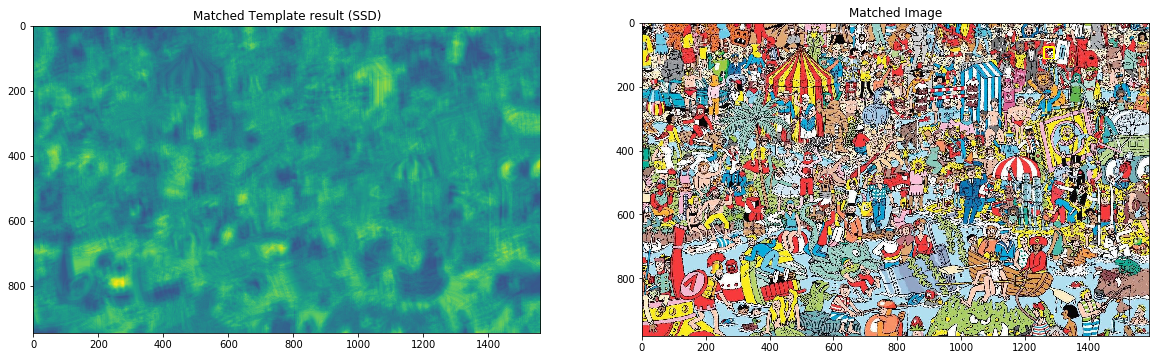

In [6]:
find_waldo(img_scene, img_waldo_1)

### Part 2

Coordinates for absolute minimum is (x,y) -> (1258, 74)


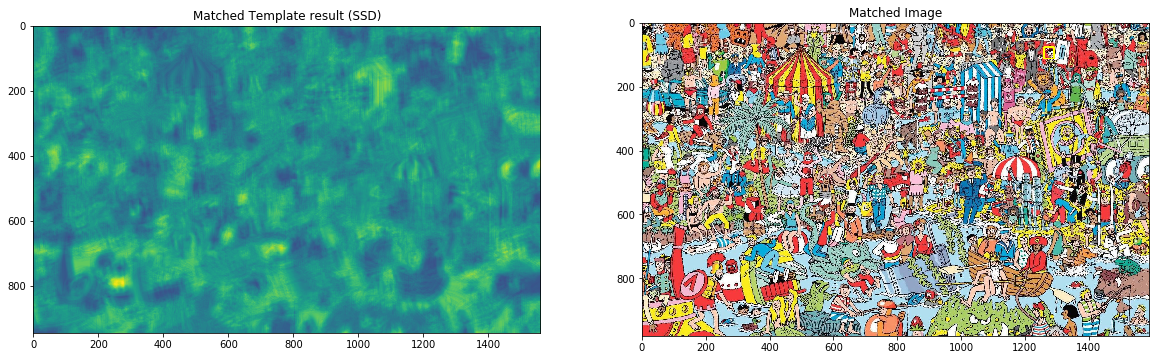

In [7]:
find_waldo(img_scene, img_waldo_2)